# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [13]:
# Load pickled data
import pickle

# Reading in files
training_file = "./train.p"
validation_file = "./valid.p"
testing_file = "./test.p"

# Opening files and loading with pickle
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Labeling X and y values
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Displaying data
print(' ... Data Loaded ... ')
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_valid.shape)
print("y_validation shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

 ... Data Loaded ... 
X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_validation shape: (4410, 32, 32, 3)
y_validation shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [14]:
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

# Displaying data
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

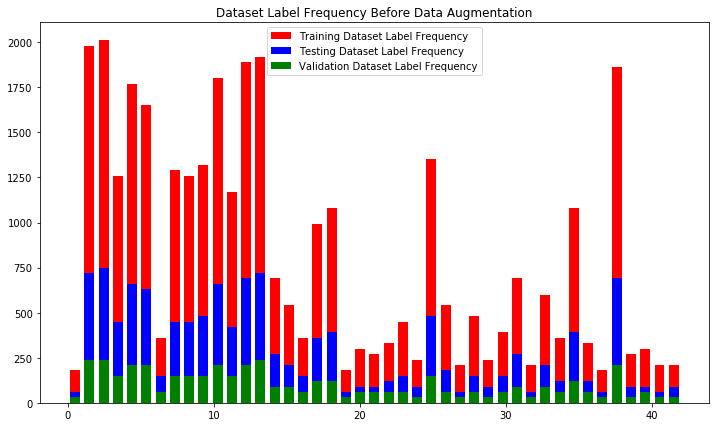

In [15]:
# Importing functions
import matplotlib.pyplot as plt
import random

%matplotlib inline

bins = n_classes
colors = ['red', 'blue', 'green']
plt.rcParams['figure.figsize'] = [12, 7]

# Histogram of label frequency
hist_train, bins = np.histogram(y_train, bins)
hist_valid, bins = np.histogram(y_valid, bins)
hist_test, bins = np.histogram(y_test, bins)

# Plotting data on one histogram
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist_train, color=colors[0], width=width, label='Training Dataset Label Frequency')
plt.bar(center, hist_test, color=colors[1], width=width, label='Testing Dataset Label Frequency')
plt.bar(center, hist_valid, color=colors[2], width=width, label='Validation Dataset Label Frequency')
plt.legend()
plt.title("Dataset Label Frequency Before Data Augmentation")
plt.show()

Note: The above chart shows the number of images per image 'category' with the red bars representing the training dataset, the blue bars representing the testing dataset, and the green bars representing the validation dataset. The y-axis shows the number of counts and the x-axis represents each image 'category'. Also, note the difference in the size of the training dataset, testing dataset, and validation dataset.

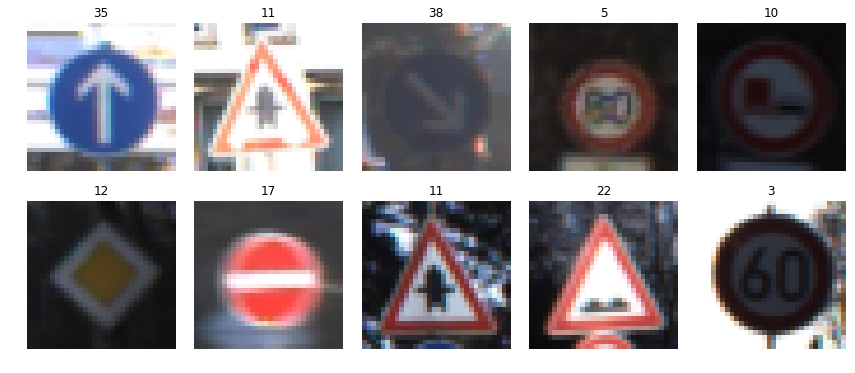

In [16]:
# Show image of 10 random data points
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

Note: The above pictures show a random selection of ten images from the training dataset. Later on, I will convert these to gray scale and compare.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [17]:
# Convert to grayscale
X_train_rgb = X_train
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

X_valid_rgb = X_valid
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

# Print data for conversion details
print(X_train_rgb.shape)
print(X_train_gray.shape)

print(X_valid_rgb.shape)
print(X_valid_gray.shape)

print(X_test_rgb.shape)
print(X_test_gray.shape)

(34799, 32, 32, 3)
(34799, 32, 32, 1)
(4410, 32, 32, 3)
(4410, 32, 32, 1)
(12630, 32, 32, 3)
(12630, 32, 32, 1)


In [18]:
# Set the datasets to the gray scale datasets.
X_train = X_train_gray
X_test = X_test_gray
X_valid = X_valid_gray

The below cell provides the method used for data augmentation. Early on in the neural network development cycle, my data was proving to be severly underfitted. I accounted for this issue by use of data augmentation specifically by warpAffine, warpPerspective, and warpAffine with tilt. All methods come from the opencv library and various examples were researched for implementation. Also to note, I wanted to create 3000 new images for each label and then split those new images into the training dataset, validation dataset, and test dataset. This also helps to account for underfitting/overfitting during the neural network development cycle.

In [19]:
## MORE DATA BY DATA AUGMENTATION

# Importing functions
import cv2
from sklearn.model_selection import train_test_split

unique_train, counts_train = np.unique(y_train, return_counts=True)

more_X_train = []
more_y_train = []

more2_X_train = []
more2_y_train = []

new_counts_train = counts_train
for i in range(n_train):
    if(new_counts_train[y_train[i]] < 3000):
        for j in range(3):
            
            ## warpAffine method from opencv.
            dx, dy = np.random.randint(-1.7, 1.8, 2)
            M = np.float32([[1, 0, dx], [0, 1, dy]]) # creating random transformation matrix
            dst = cv2.warpAffine(X_train[i], M, (X_train[i].shape[0], X_train[i].shape[1])) # warpAffine method call
            dst = dst[:,:,None]
            more_X_train.append(dst) # Appending to a predefined array of more 'features'
            more_y_train.append(y_train[i]) # Appending to a predefined array of more 'labels' * does not create more labels
            
            ## warpPerspective method from opencv. * Similar use as seen in advanced lane finding project
            random_higher_bound = random.randint(27, 32)
            random_lower_bound = random.randint(0, 5)
            src_points = np.float32([[0,0],[32,0],[0,32],[32,32]])
            # Creates random destination points to allow for a variation of warped images.
            dst_points = np.float32([[0, 0], [random_higher_bound, random_lower_bound],
                                     [random_lower_bound, 32],[32, random_higher_bound]])
            M = cv2.getPerspectiveTransform(src_points, dst_points)
            dst = cv2.warpPerspective(X_train[i], M, (32,32)) # warpPerspective method call
            more2_X_train.append(dst) # Appending to a predefined array of more 'features'
            more2_y_train.append(y_train[i]) # Appending to a predefined array of more 'labels'
            
            
            ## warpAffine method with random tilt
            tilt = random.randint(-12, 12)
            # M is generated as a random rotation matrix rather than the random transformation matrix seen before
            M = cv2.getRotationMatrix2D((X_train[i].shape[0]/2, X_train[i].shape[1]/2), tilt, 1)
            dst = cv2.warpAffine(X_train[i], M, (X_train[i].shape[0], X_train[i].shape[1])) # warpAffine method call
            more2_X_train.append(dst)# Appending to a predefined array of more 'features'
            more2_y_train.append(y_train[i]) # Appending to a predefined array of more 'labels'
            
            new_counts_train[y_train[i]] += 2
            
## Concatenating and reshaping arrays to format of the training datasets
more_X_train = np.array(more_X_train)
more_y_train = np.array(more_y_train)
X_train = np.concatenate((X_train, more_X_train), axis=0)
y_train = np.concatenate((y_train, more_y_train), axis=0)

more2_X_train = np.array(more_X_train)
more2_y_train = np.array(more_y_train)
more2_X_train = np.reshape(more2_X_train, (np.shape(more2_X_train)[0], 32, 32, 1))
X_train = np.concatenate((X_train, more2_X_train), axis=0)
y_train = np.concatenate((y_train, more2_y_train), axis=0)

X_train = np.concatenate((X_train, X_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

## Splitting sets to add augmented data to validation dataset and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Print data for change in dataset size
print(more_X_train.shape)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(36558, 32, 32, 1)
(89860, 32, 32, 1)
(22465, 32, 32, 1)
(12630, 32, 32, 1)


Shown above is the size of each dataset after data augmentation. The training dataset starts at 34799 images and gets increased to 89860 images. The validation dataset starts at 4410 images and gets increased to 22465 images.

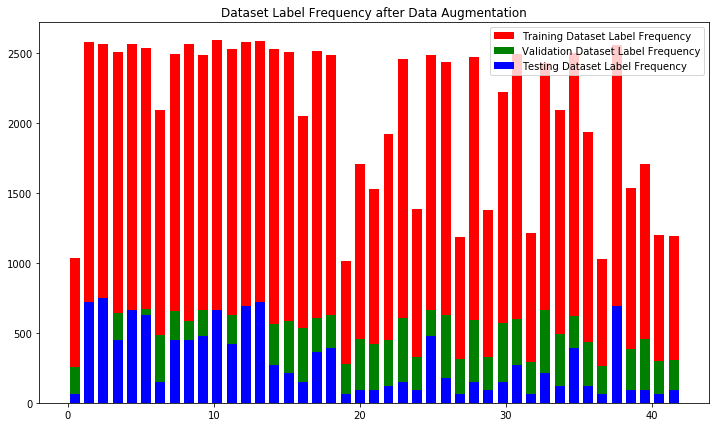

In [20]:
bins = n_classes
colors = ['red', 'blue', 'green']
plt.rcParams['figure.figsize'] = [12, 7]

# histogram of label frequency
hist_train, bins = np.histogram(y_train, bins)
hist_valid, bins = np.histogram(y_valid, bins)
hist_test, bins = np.histogram(y_test, bins)

# Plotting data on one histogram
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist_train, color=colors[0], width=width, label='Training Dataset Label Frequency')
plt.bar(center, hist_valid, color=colors[2], width=width, label='Validation Dataset Label Frequency')
plt.bar(center, hist_test, color=colors[1], width=width, label='Testing Dataset Label Frequency')
plt.legend()
plt.title("Dataset Label Frequency after Data Augmentation")
plt.show()

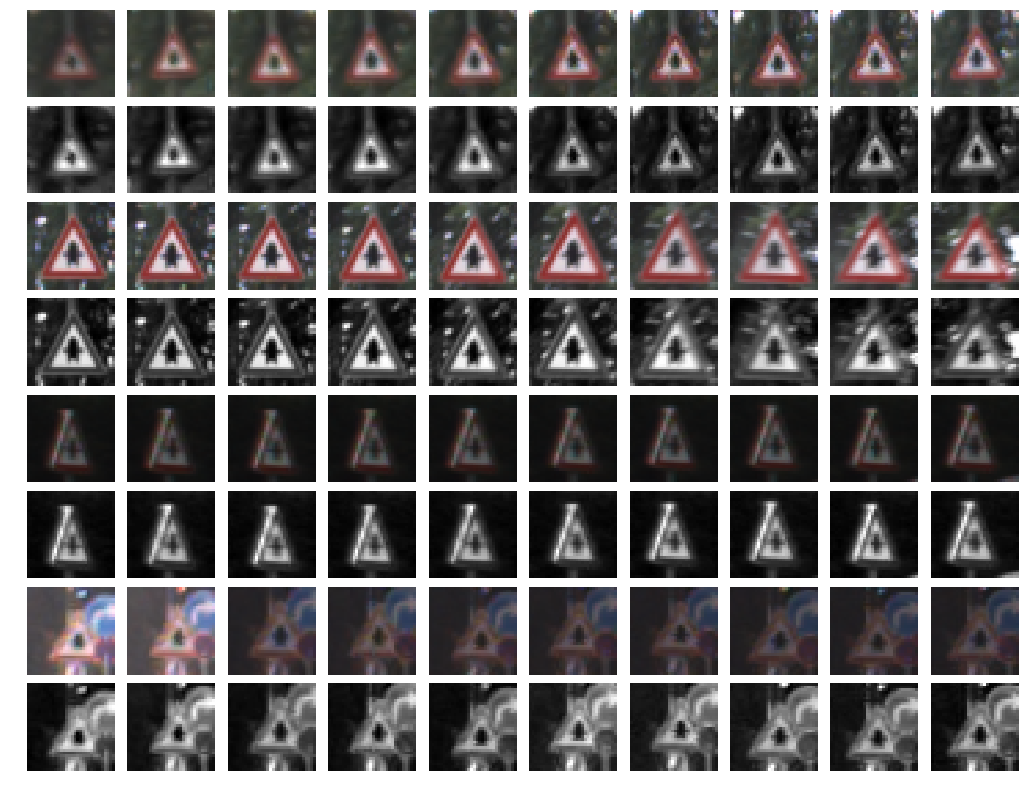

In [21]:
# Visualize rgb vs grayscale
n_rows = 8
n_cols = 10
offset = 9000
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 14))
fig.subplots_adjust(hspace = .1, wspace=.001)
axs = axs.ravel()
for j in range(0,n_rows,2):
    for i in range(n_cols):
        index = i + j*n_cols
        image = X_train_rgb[index + offset]
        axs[index].axis('off')
        axs[index].imshow(image)
    for i in range(n_cols):
        index = i + j*n_cols + n_cols 
        image = X_train_gray[index + offset - n_cols].squeeze()
        axs[index].axis('off')
        axs[index].imshow(image, cmap='gray')

In [22]:
## Normalizing datasets to (-1,1)
X_train_normalized = (X_train.astype(float) - 128.0)/128
X_valid_normalized = (X_valid.astype(float) - 128.0)/128
X_test_normalized = (X_test.astype(float) - 128.0)/128

# Printing for normalization visual
print(np.mean(X_train))
print(np.mean(X_valid))
print(np.mean(X_test))

print(np.mean(X_train_normalized))
print(np.mean(X_valid_normalized))
print(np.mean(X_test_normalized))

80.2823185241
80.0328173977
82.1484603612
-0.37279438653
-0.374743614081
-0.358215153428


In [23]:
# Shuffling datasets to reduce variance and reduce likeliness to overfit.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train_normalized, y_train)
X_valid, y_valid = shuffle(X_valid_normalized, y_valid)
X_test, y_test = shuffle(X_test_normalized, y_test)

### Model Architecture

In [24]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 32

In [25]:
# LENET CNN ARCHITECTURE
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    x = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID')
    x = tf.nn.bias_add(x, conv1_b)
    
    # Activation.
    x = tf.nn.relu(x)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 10), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(10))
    x = tf.nn.conv2d(x, conv2_W, strides=[1, 1, 1, 1], padding='VALID')
    x = tf.nn.bias_add(x, conv2_b)
    
    # Activation.
    x = tf.nn.relu(x)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    x = flatten(x)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(int(np.shape(x)[1]),120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))    
    x = tf.matmul(x, fc1_W)
    x = tf.nn.bias_add(x, fc1_b)
    
    # Dropout.
    x = tf.nn.dropout(x, keep_prob)
    
    # Activation.
    x = tf.nn.relu(x)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84)) 
    x = tf.matmul(x, fc2_W)
    x = tf.nn.bias_add(x, fc2_b)
    
    # Dropout.
    x = tf.nn.dropout(x, keep_prob)
    
    # Activation.
    x = tf.nn.relu(x)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43)) 
    logits = tf.add(tf.matmul(x, fc3_W), fc3_b)
    
    return logits

print('done')

done


## The Lenet architecture that I use is as follows: 
    1 - Input 32x32 grayscale image.
    2 - Convolution layer outputs 28x28x6.
    3 - Relu / Max pool outputs 14x14x6.
    4 - Convolution layer outputs 10x10x16.
    5 - Relu / Max pool outputs 5x5x16.
    6 - Flatten layer outputs size 400.
    7 - Fully connected layer outputs size 120.
    8 - Dropout / Relu to reduce overfitting.
    9 - Fully connected layer outputs size 84.
    10 - Dropout / Relu to reduce overfitting.
    11 - Fully connected layer outputs size 43.

In [26]:
# Creating placeholders.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

print('done')

done


In [27]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

print('done')

done


Note: I used the AdamOptimizer that is popular with the Lenet architecture to optimize the training of the neural network with a learning rate of 0.001. 

In [28]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print('done')

done


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
# Training and validating model

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_normalized)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        test_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet_training')

Training...

EPOCH 1 ...
Test Accuracy = 0.885
Validation Accuracy = 0.883

EPOCH 2 ...
Test Accuracy = 0.937
Validation Accuracy = 0.936

EPOCH 3 ...
Test Accuracy = 0.964
Validation Accuracy = 0.961

EPOCH 4 ...
Test Accuracy = 0.975
Validation Accuracy = 0.973

EPOCH 5 ...
Test Accuracy = 0.979
Validation Accuracy = 0.976

EPOCH 6 ...
Test Accuracy = 0.983
Validation Accuracy = 0.980

EPOCH 7 ...
Test Accuracy = 0.986
Validation Accuracy = 0.982

EPOCH 8 ...
Test Accuracy = 0.987
Validation Accuracy = 0.984

EPOCH 9 ...
Test Accuracy = 0.986
Validation Accuracy = 0.983

EPOCH 10 ...
Test Accuracy = 0.987
Validation Accuracy = 0.985

EPOCH 11 ...
Test Accuracy = 0.988
Validation Accuracy = 0.984

EPOCH 12 ...
Test Accuracy = 0.989
Validation Accuracy = 0.985

EPOCH 13 ...
Test Accuracy = 0.991
Validation Accuracy = 0.987

EPOCH 14 ...
Test Accuracy = 0.992
Validation Accuracy = 0.988

EPOCH 15 ...
Test Accuracy = 0.993
Validation Accuracy = 0.990

EPOCH 16 ...
Test Accuracy = 0.992
V

## Results:

1st run:
After 10 Epochs and a batch size of 32, I gained a test accuracy of 99.1% and a validation accuracy of 98.8%!

2nd run:
After 30 Epochs and a batch size of 32, I gained a test accuracy of 99.4% and a validation accuracy of 99.0%!

In [24]:
# Testing the model and displaying results.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    
    valid_accuracy = evaluate(X_valid, y_valid)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))    
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet_training
Train Accuracy = 0.994
Valid Accuracy = 0.990
Test Accuracy = 0.940


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [29]:
# Reinitialize and re-import if starting a new kernel here
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import cv2

print('done')

done


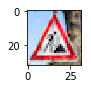

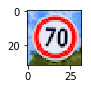

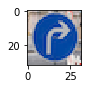

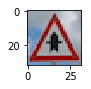

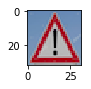

In [30]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import cv2

name_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')

my_images = sorted(glob.glob('./my_traffic_signs/*.png'))
my_labels = np.array([25, 4, 33, 11, 18])

my_signs = []
for my_image in my_images:
    img = cv2.cvtColor(cv2.imread(my_image), cv2.COLOR_BGR2RGB)
    my_signs.append(img)
    plt.figure(figsize=(1,1))
    plt.imshow(img)    
    plt.figure()

In [31]:
my_signs = np.asarray(my_signs)
my_signs_gry = np.sum(my_signs/3, axis=3, keepdims=True)
my_signs_normalized = (my_signs_gry - 128)/128
print(my_signs_normalized.shape)

(5, 32, 32, 1)


### Predict the Sign Type for Each Image

In [33]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet_training')
    my_accuracy = evaluate(my_signs_normalized, my_labels)
    print("My Data Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet_training
My Data Set Accuracy = 1.000


### Analyze Performance

INFO:tensorflow:Restoring parameters from ./lenet_training


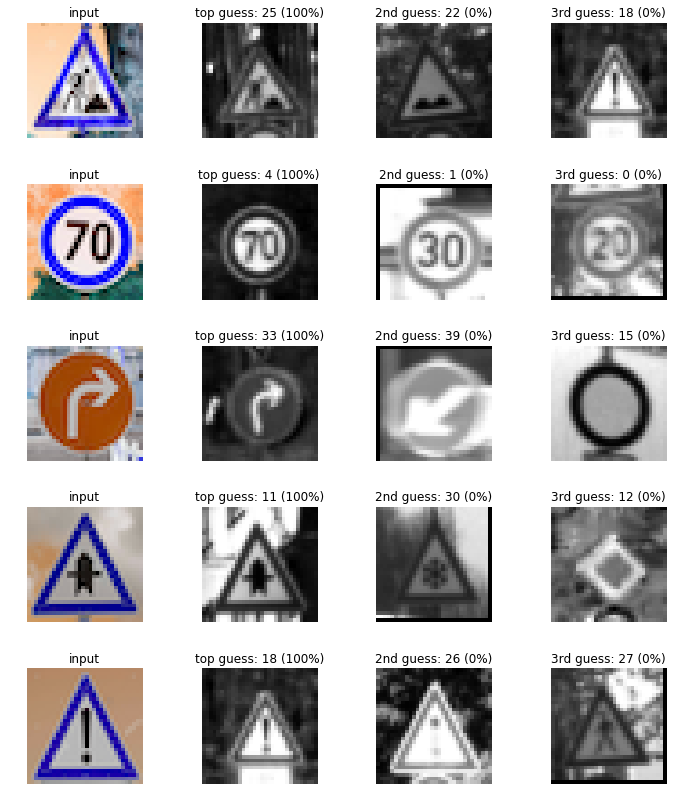

In [35]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet_training.meta')
    saver.restore(sess, "./lenet_training")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_signs_normalized, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_signs_normalized, keep_prob: 1.0})

    
    fig, axs = plt.subplots(len(my_signs),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(my_signs):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

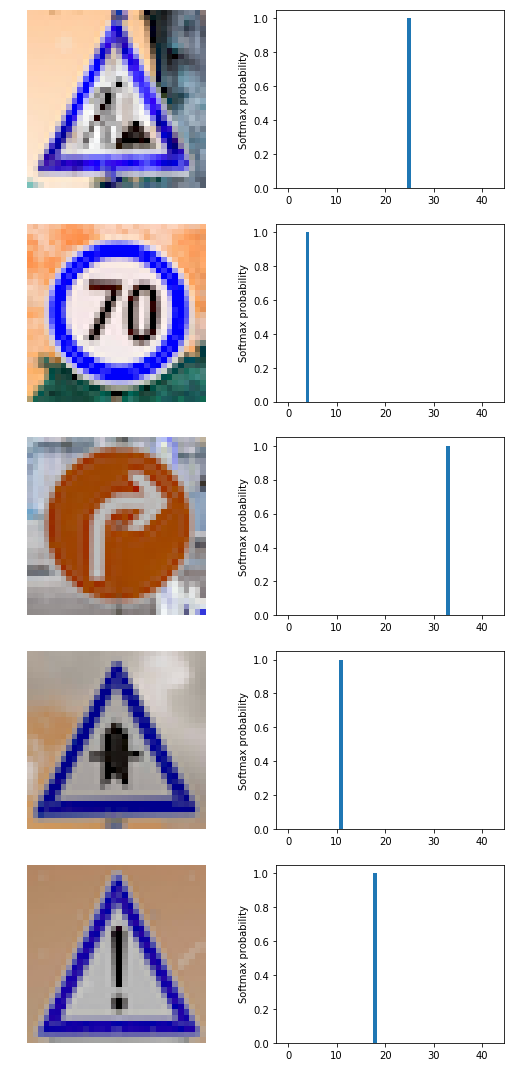

In [37]:
fig, axs = plt.subplots(5,2, figsize=(9, 19))
axs = axs.ravel()

for i in range(len(my_softmax_logits)*2):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(cv2.cvtColor(my_signs[i//2], cv2.COLOR_BGR2RGB))
    else:
        axs[i].bar(np.arange(n_classes), my_softmax_logits[(i-1)//2]) 
        axs[i].set_ylabel('Softmax probability')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.